In [5]:
# Created on May 24, 2020

# @author: nandroid


import math
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.solvers import solve
from sympy import Symbol


# Problema

Se quiere diseñar un sistema de radar para proteger los recursos icticolas del Mar Argentino, de la zona económica exclusiva de nuestro paı́s que tiene una distancia de 350millas desde la costa, equivale a 648, 2km, para poder controlar la pesca clandestina, y la depredación que ocurre en la actualidad. Supongase que se tiene un transmisor que provee una potencia de 500kW que se conecta a la antena, la RCS de los barcos pesqueros σ ∼= 10000m2 y que el receptor es un analizador de espectro con Wrmin = -80dBm.

Considere que la antena transmisora es la misma que la receptora con G ∼= 30dB y se desea instalar en Comodoro Rivadavia, como se observa en el mapa. Se pide:

In [6]:
pi = math.pi
c = 3e8
f_scale = 100e6
dist_scale = 1000

dist_sea = 648.2e3 # m
gain = 30 # dB

x = Symbol('x')
f1 =  gain*sympy.log(10) - 10*sympy.log(x)
gain_times = solve(f1, x)   # 1000
G_times = 1e3


# Tx
w_t = 500e3 # W    |    500e3 W => P(dBm) = 10 ⋅ log10( 1000 ⋅ P(W) / 1W) => 86.99 dBm 
RCS = 1e4 # m^2    Radar cross-section (RCS)
antenna_gain = gain

# Rx
w_rmin = 1e-11 # W    | -80 dBm => P(dBm) = 10 ⋅ log10( 1000 ⋅ P(W) / 1W) => 100e3 W minima potencia recibida por el analizador de espectro 

## a) Representar graficamente el Rango máximo en función de la frecuencia desde 1MHz a 20GHz
    
        

En base a la presentacion Ecuacion de Radar - pag. 17,
        
Como la antena receptora se ubica en el mismo sitio que la antena transmisora, entonces R1 = R2 = R.
        
Para la minima señal detectable por el receptor W_rmin, se obtiene el rango máximo del radar R_max.
        
        
The frequencies of radar sets today range from about 5 megahertz to about 130 gigahertz.
https://www.radartutorial.eu/07.waves/Waves%20and%20Frequency%20Ranges.en.html
https://www.ntia.doc.gov/files/ntia/publications/ntia00-40.pdf (pag. 6)
        


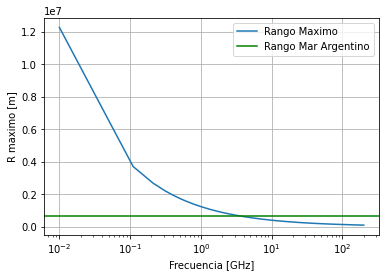

In [7]:
f_min = 1e6
f_max = 20e9

d_freq = np.arange(f_min, f_max, 10e6)

range_max = []

pi_factor = (4*pi)**3
w = w_t/w_rmin
G = pow(G_times,2)
exp = 1/4

for freq in d_freq:
    lambda_antenna = c/freq
    friis_term = pow(lambda_antenna,2)/pi_factor

    r_max = pow(w*RCS*G*friis_term ,exp)
    range_max.append(r_max)

plt.ion()
plt.figure(1)

plt.semilogx(d_freq/f_scale, range_max, label='Rango Maximo')
plt.axhline(648200,0 , 10, color='g', label='Rango Mar Argentino')

plt.grid()
plt.legend()

plt.xlabel('Frecuencia [GHz]')
plt.ylabel('R maximo [m]')

plt.ioff()
plt.show()

## b) Repetir a) para el Rango máximo en función de la longitud de onda.


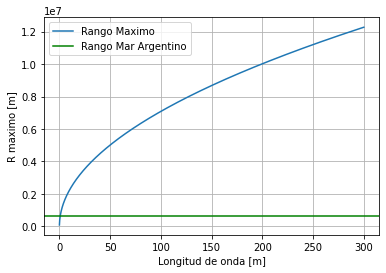

In [8]:
lambda_min = c / f_max
lambda_max = c / f_min

d_lambda = np.arange(lambda_min, lambda_max, 0.15)
range_max_lambda = []

for lam in d_lambda:
    friis_term = pow(lam,2)/pi_factor

    r_max = pow(w*RCS*G*friis_term ,exp)
    range_max_lambda.append(r_max)


plt.ion()
plt.figure(2)

plt.plot(d_lambda, range_max_lambda, label='Rango Maximo')
plt.axhline(648200,0 , 10, color='g', label='Rango Mar Argentino')

plt.grid()
plt.legend()

plt.xlabel('Longitud de onda [m]')
plt.ylabel('R maximo [m]')

plt.ioff()
plt.show()

## c) Para que frecuencias funcionaria bien el sistema para poder construirlo?


Al observar la curva de rango en funcion de la frecuencia, se considera que el correcto funcionamiento será entre 0~325 MHz, donde este último corresponde a la frecuencia donde se cubre el alcance del Mar Argentino.